In [123]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import load_diabetes, make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RANSACRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [124]:
data = load_diabetes()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [125]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [126]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [127]:
model.intercept_

151.00821291456543

In [128]:
model.coef_

array([  29.25401303, -261.7064691 ,  546.29972304,  388.39834056,
       -901.95966819,  506.76324136,  121.15435079,  288.03526689,
        659.26895081,   41.37670105])

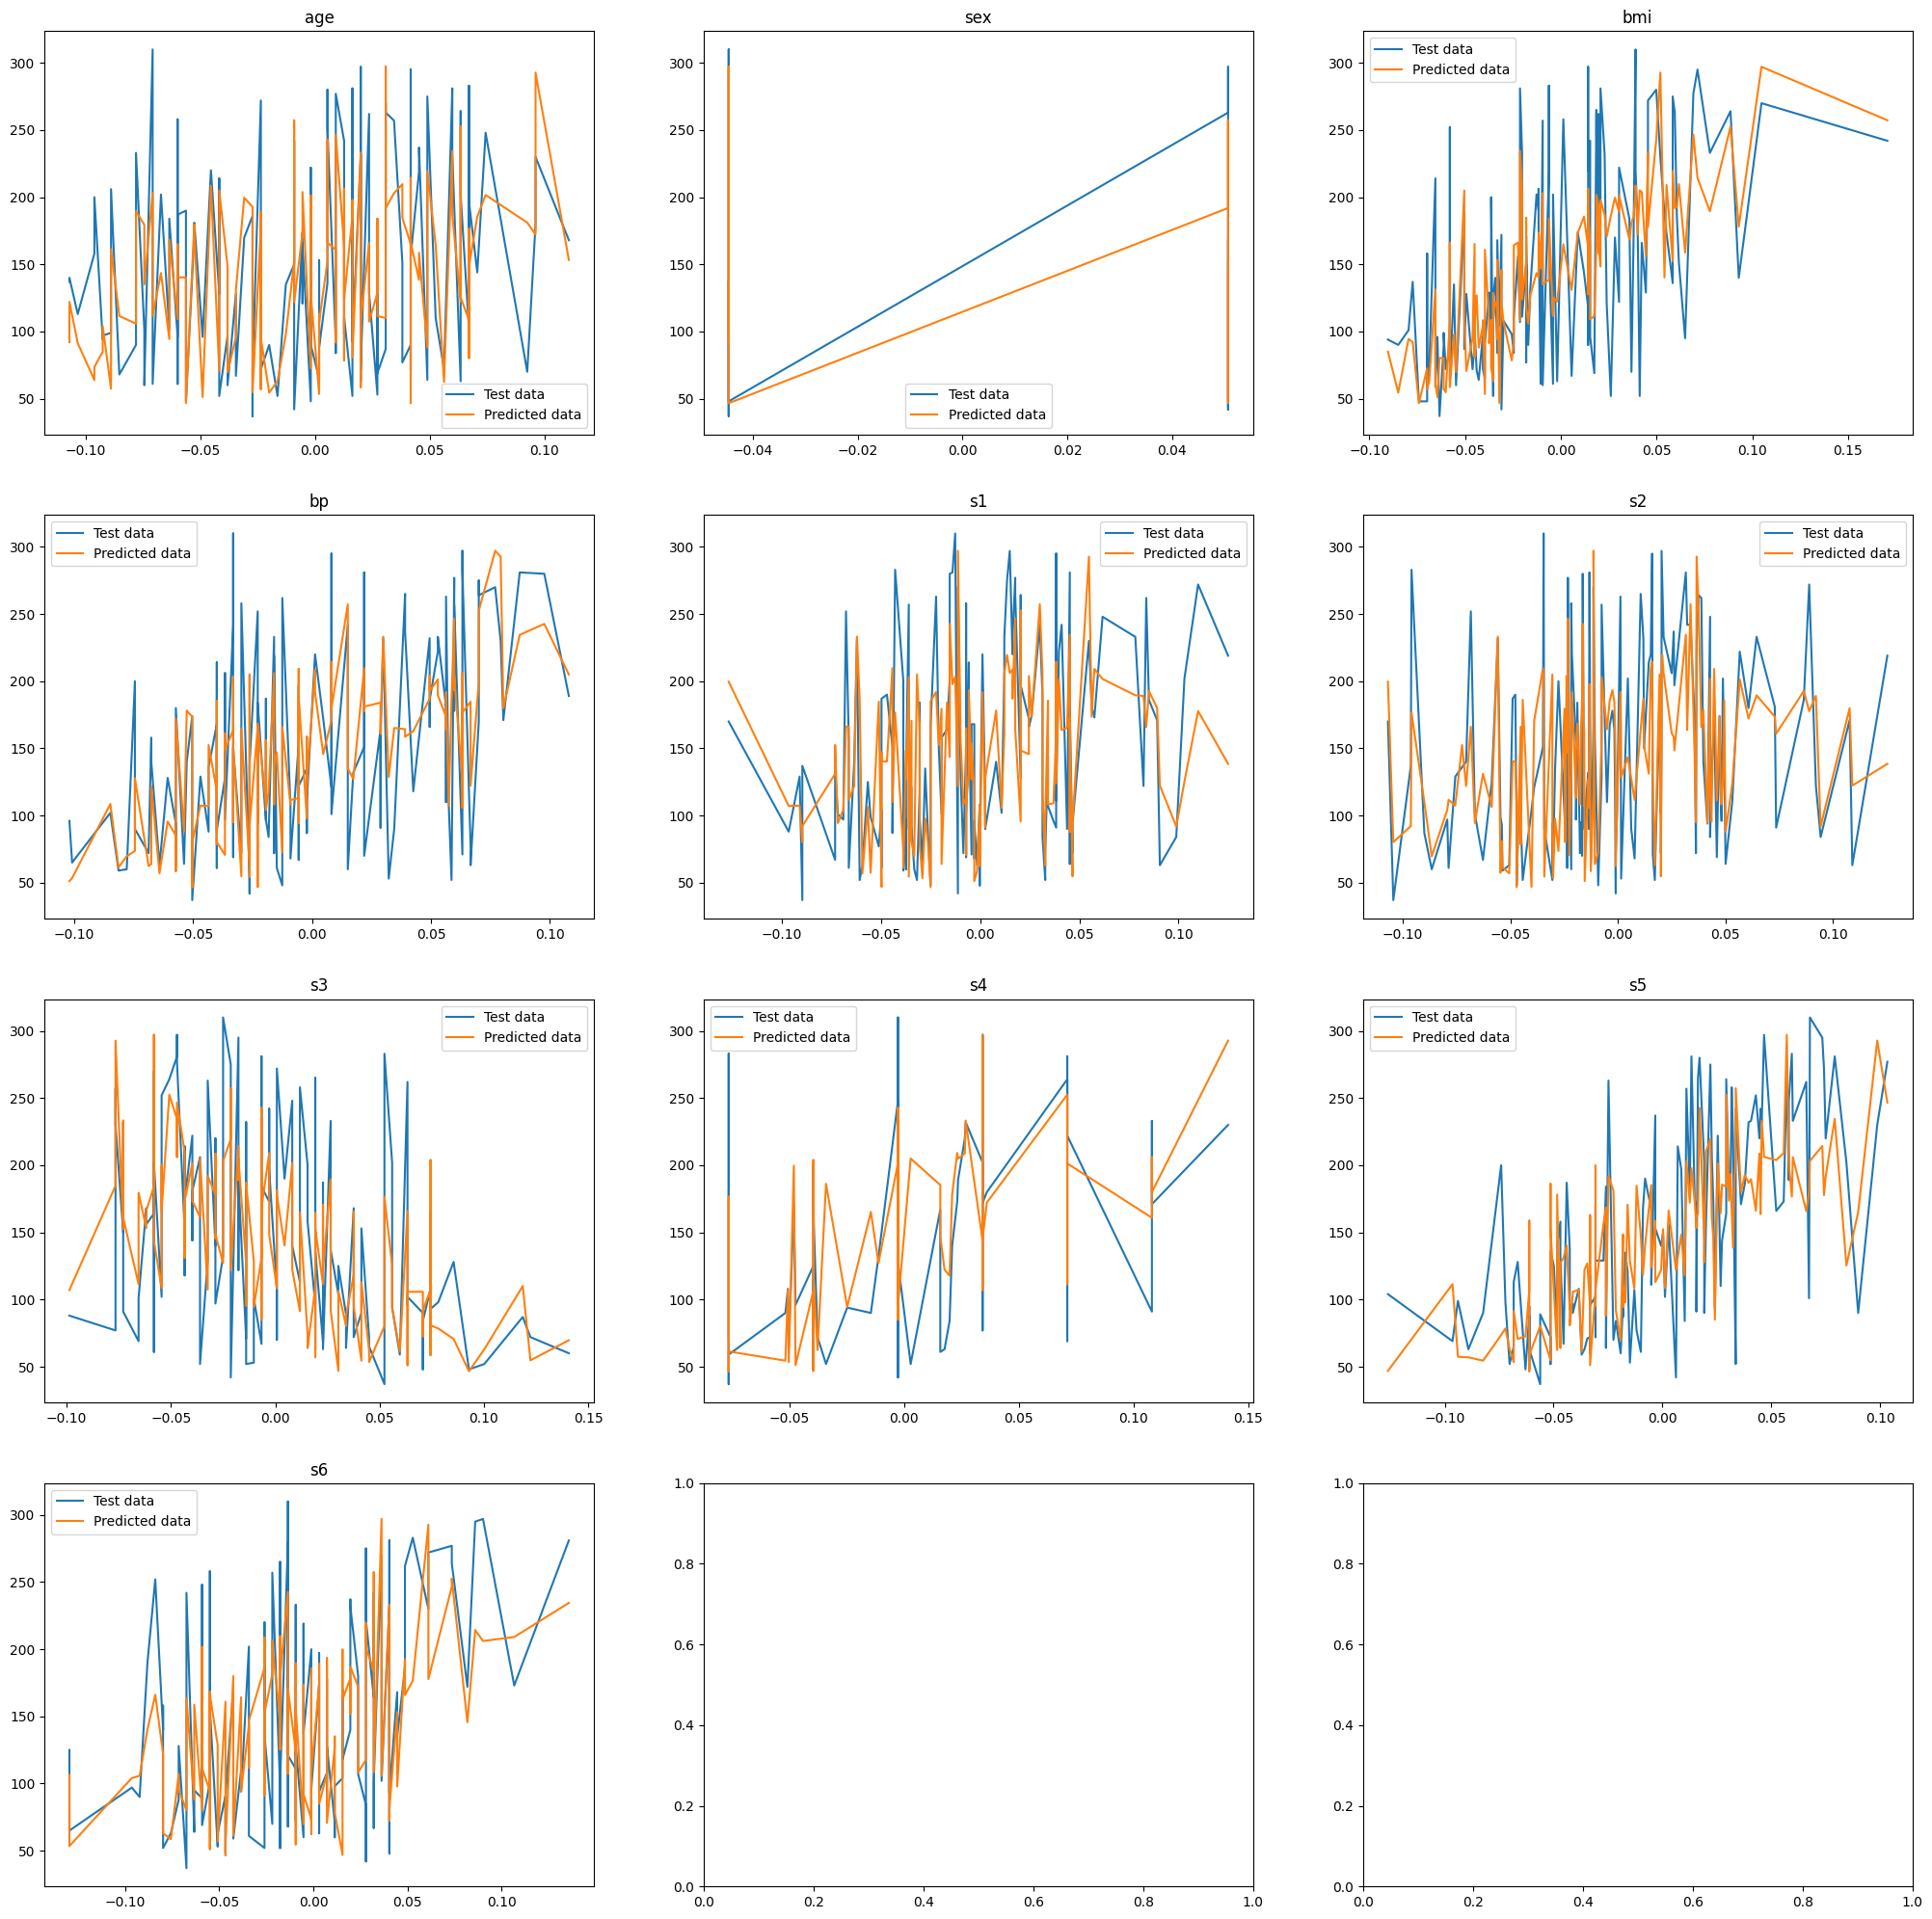

In [129]:
df_test = pd.DataFrame(data=X_test, columns=X_test.columns)
df_test['target'] = y_test
df_test['predict'] = y_pred
fig, axs = plt.subplots(4, 3, figsize=(25, 25))
i, j = 0, 0
for col in [i for i in df.columns if i not in ['target', 'predict']]:
    df_test.sort_values(by=col, inplace=True)
    axs[i, j].plot(df_test[col], df_test['target'], label='Test data')
    axs[i, j].plot(df_test[col], df_test['predict'], label='Predicted data')
    axs[i, j].set_title(col)
    axs[i, j].legend()
    j += 1
    if j >= 3:
        i += 1
        j = 0

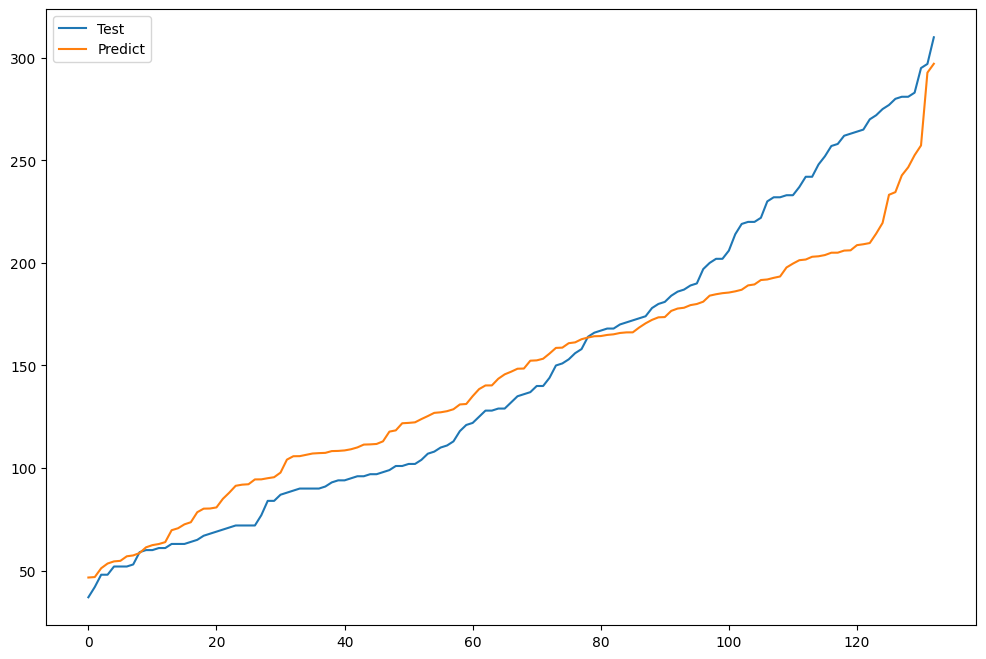

In [130]:
plt.figure(figsize=(12, 8))
df_test['target'].sort_values().reset_index(drop=True).plot(label='Test')
df_test['predict'].sort_values().reset_index(drop=True).plot(label='Predict')
plt.legend();

In [131]:
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     32.86
Date:                Thu, 28 Mar 2024   Prob (F-statistic):           1.37e-42
Time:                        17:37:42   Log-Likelihood:                -1671.5
No. Observations:                 309   AIC:                             3365.
Df Residuals:                     298   BIC:                             3406.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.0082      3.143     48.050      0.000     144.823     157.193
age           29.2540     74.280      0.394      0.694    -116.926     175.434
sex         -261.7065     73.301     -3.570      0.000    -405.961    -117.452
bmi          546.2997     81.326      6.717      0.000     386.255     706.345
bp           388.3983     77.707      4.998      0.000     235.474     541.322
s1          -901.9597    479.190     -1.882      0.061   -1844.985      41.066
s2           506.7632    385.746      1.314      0.190    -252.368    1265.895
s3           121.1544    245.611      0.493      0.622    -362.197     604.506
s4           288.0353    196.608      1.465      0.144     -98.881     674.951
s5           659.2690    207.907      3.171      0.002     250.118    1068.420
s6            41.3767     79.783      0.519      0.604    -115.632     198.386
==============================================================================
Omnibus:                        1.511   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.470   Jarque-Bera (JB):                1.417
Skew:                           0.056   Prob(JB):                        0.492
Kurtosis:                       2.688   Cond. No.                         215.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
X

,const,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
225,1.0,0.030811,0.050680,0.032595,0.049415,-0.040096,-0.043589,-0.069172,0.034309,0.063015,0.003064
412,1.0,0.074401,-0.044642,0.085408,0.063187,0.014942,0.013091,0.015505,-0.002592,0.006207,0.085907
118,1.0,-0.056370,0.050680,-0.010517,0.025315,0.023198,0.040022,-0.039719,0.034309,0.020609,0.056912
114,1.0,0.023546,-0.044642,0.110198,0.063187,0.013567,-0.032942,-0.024993,0.020655,0.099241,0.023775
364,1.0,0.001751,0.050680,-0.006206,-0.019442,-0.009825,0.004949,-0.039719,0.034309,0.014821,0.098333
...,...,...,...,...,...,...,...,...,...,...,...
106,1.0,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059471,-0.083920
270,1.0,0.005383,0.050680,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008641,0.015491
348,1.0,0.030811,-0.044642,-0.020218,-0.005670,-0.004321,-0.029497,0.078093,-0.039493,-0.010903,-0.001078
435,1.0,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357


In [133]:
X_test['pred'] = X_test.apply(
    lambda x: 151.0082 + x['age'] * 29.254 + x['sex'] * -261.7065 + x['bmi'] * 546.2997 + x['bp'] * 288.2983 + x[
        's1'] * -901.9597 + x['s2'] * 506.7632 + x['s3'] * 121.1544 + x['s4'] * 288.0353 + x['s5'] * 659.269 + x[
                  's6'] * 41.3767, axis=1)
X_test

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,pred
287,0.045341,-0.044642,-0.006206,-0.015999,0.125019,0.125198,0.019187,0.034309,0.032432,-0.005220,140.071181
211,0.092564,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022517,-0.021788,178.911082
72,0.063504,0.050680,-0.004050,-0.012556,0.103003,0.048790,0.056003,-0.002592,0.084492,-0.017646,126.600864
321,0.096197,-0.044642,0.051996,0.079265,0.054845,0.036577,-0.076536,0.141322,0.098648,0.061054,284.825360
73,0.012648,0.050680,-0.020218,-0.002228,0.038334,0.053174,-0.006584,0.034309,-0.005142,-0.009362,124.106016
...,...,...,...,...,...,...,...,...,...,...,...
238,0.034443,0.050680,-0.009439,0.059744,-0.035968,-0.007577,-0.076536,0.071210,0.011011,-0.021788,197.017422
26,-0.107226,-0.044642,-0.077342,-0.026328,-0.089630,-0.096198,0.026550,-0.076395,-0.042571,-0.005220,94.736386
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,115.619135
401,0.016281,-0.044642,-0.045007,-0.057313,-0.034592,-0.053923,0.074412,-0.076395,-0.042571,0.040343,86.545714


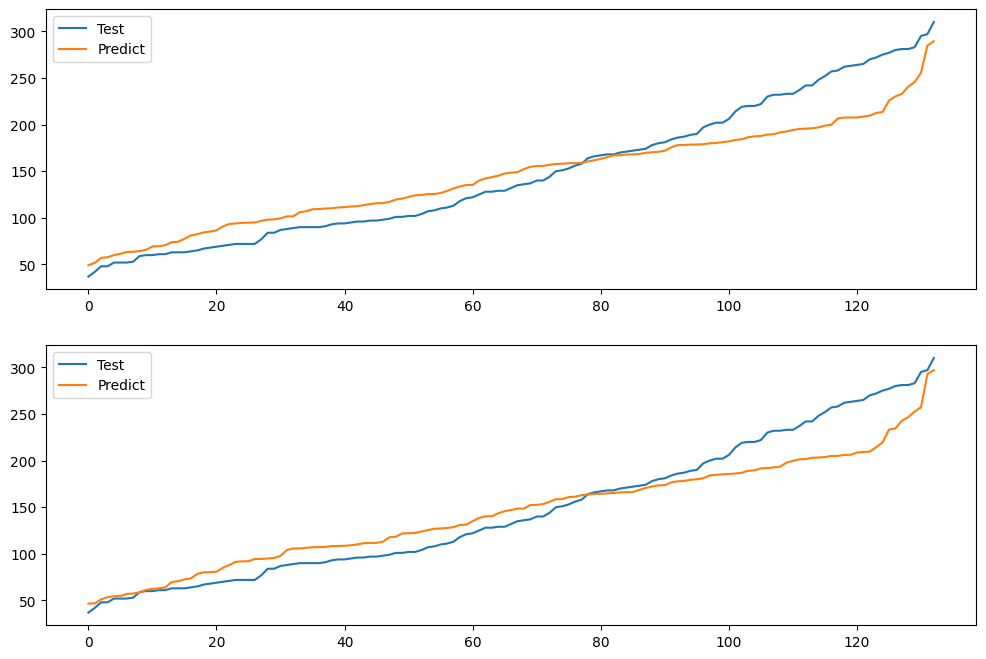

In [134]:
fig, axs = plt.subplots(2, figsize=(12, 8))
axs[0].plot(y_test.sort_values().reset_index(drop=True), label='Test')
axs[0].plot(X_test['pred'].sort_values().reset_index(drop=True), label='Predict')
axs[1].plot(df_test['target'].sort_values().reset_index(drop=True), label='Test')
axs[1].plot(df_test['predict'].sort_values().reset_index(drop=True), label='Predict')
axs[0].legend()
axs[1].legend();

In [135]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
err = 10000000000000000000000
for a in range(0, 11):
    ridge = Ridge(alpha=a * 0.1)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    if mean_squared_error(y_test, y_pred) < err:
        best_a = a
ridge = Ridge(alpha=best_a * 0.1)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
best_a

10

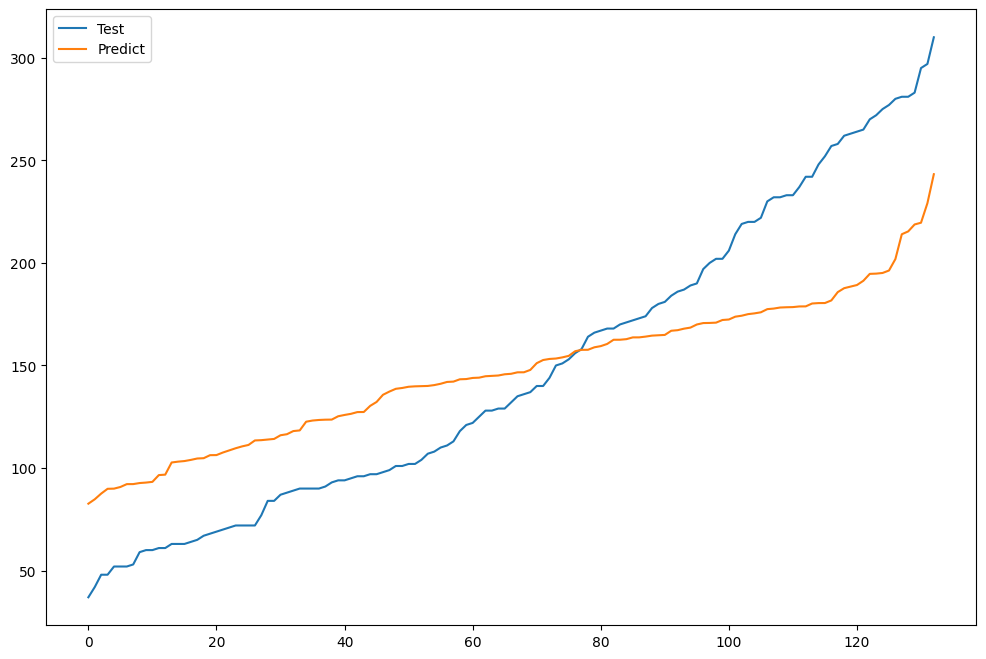

In [136]:
y_pred.sort()
plt.figure(figsize=(12, 8))
plt.plot([i for i in range(len(y_pred))], y_test.sort_values().reset_index(drop=True), label='Test')
plt.plot([i for i in range(len(y_pred))], y_pred, label='Predict')
plt.legend();

In [143]:
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
err = 10000000000000000000000
for a in range(1, 11):
    lasso = Lasso(alpha=a * 0.1)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    if mean_squared_error(y_test, y_pred) < err:
        best_a = a
lasso = Lasso(alpha=best_a * 0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
best_a

10

In [148]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_l = lr_model.predict(X_test)
lr_model.coef_

array([16.76788933, 54.13882379,  5.18664713, 63.65233553, 93.6071948 ,
       70.63063877, 87.07007903, 10.43293371,  3.15217068, 70.90697249])

In [144]:
lasso.coef_

array([15.34490239, 53.60760928,  3.79072499, 62.9057643 , 91.8554604 ,
       69.54746365, 85.97596349,  8.35888462,  2.14251373, 69.28758578])

In [147]:
lr_model.intercept_

0.018211147984719567

In [145]:
lasso.intercept_

0.30413318802691425

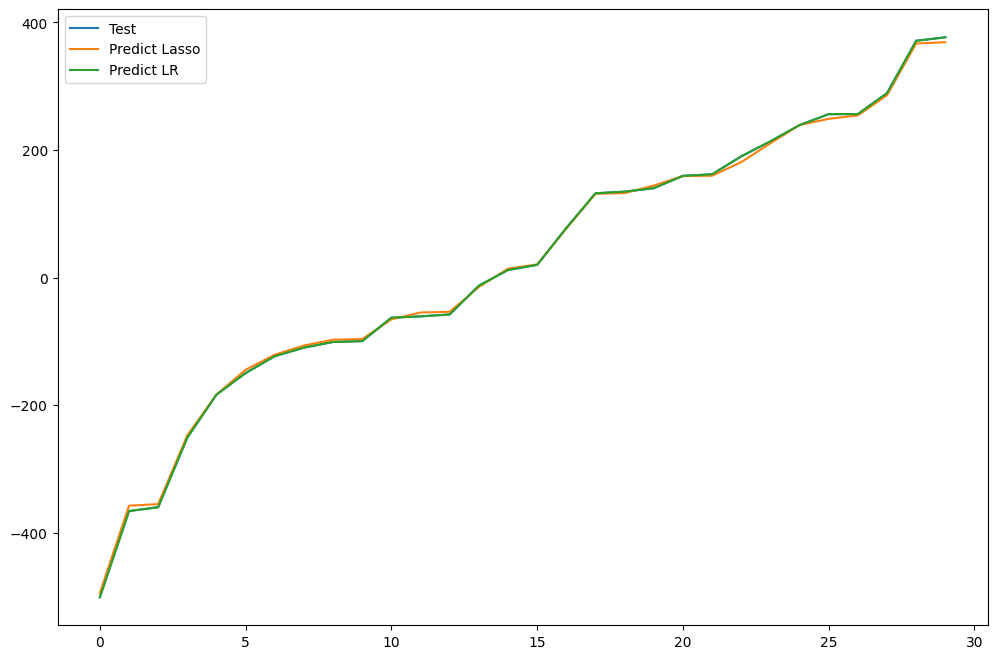

In [153]:
y_pred.sort()
y_test.sort()
y_pred_l.sort()
plt.figure(figsize=(12, 8))
plt.plot([i for i in range(len(y_pred))], y_test, label='Test')
plt.plot([i for i in range(len(y_pred))], y_pred, label='Predict Lasso')
plt.plot([i for i in range(len(y_pred))], y_pred_l, label='Predict LR')
plt.legend();

In [139]:
X, y = make_regression(n_samples=100, n_features=10, noise=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
err = 10000000000000000000000
for a in range(1, 11):
    for b in range(1, 11):
        model = ElasticNet(alpha=a * 0.1, l1_ratio=b * 0.1)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        if mean_squared_error(y_test, y_pred) < err:
            best_a = a
            best_b = b
model = ElasticNet(alpha=best_a * 0.1, l1_ratio=best_b * 0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
best_a, best_b

(10, 10)

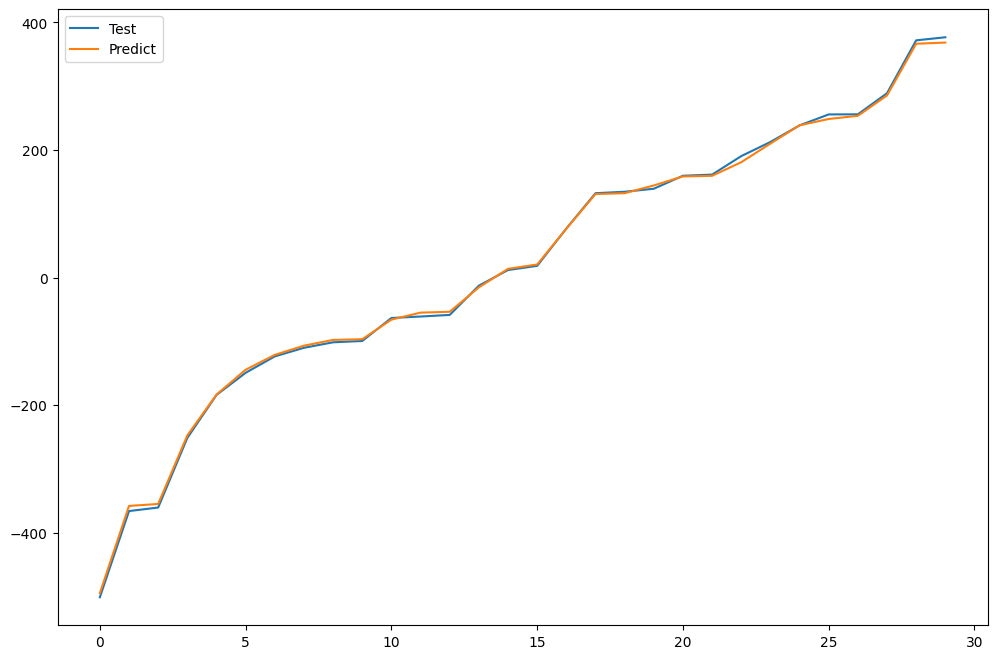

In [140]:
y_pred.sort()
y_test.sort()
plt.figure(figsize=(12, 8))
plt.plot([i for i in range(len(y_pred))], y_test, label='Test')
plt.plot([i for i in range(len(y_pred))], y_pred, label='Predict')
plt.legend();

In [158]:
X = np.random.rand(100, 1) * 10
y = 0.7 * X + np.random.randn(100, 1)

ransac = RANSACRegressor()
ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

slope = ransac.estimator_.coef_
intercept = ransac.estimator_.intercept_

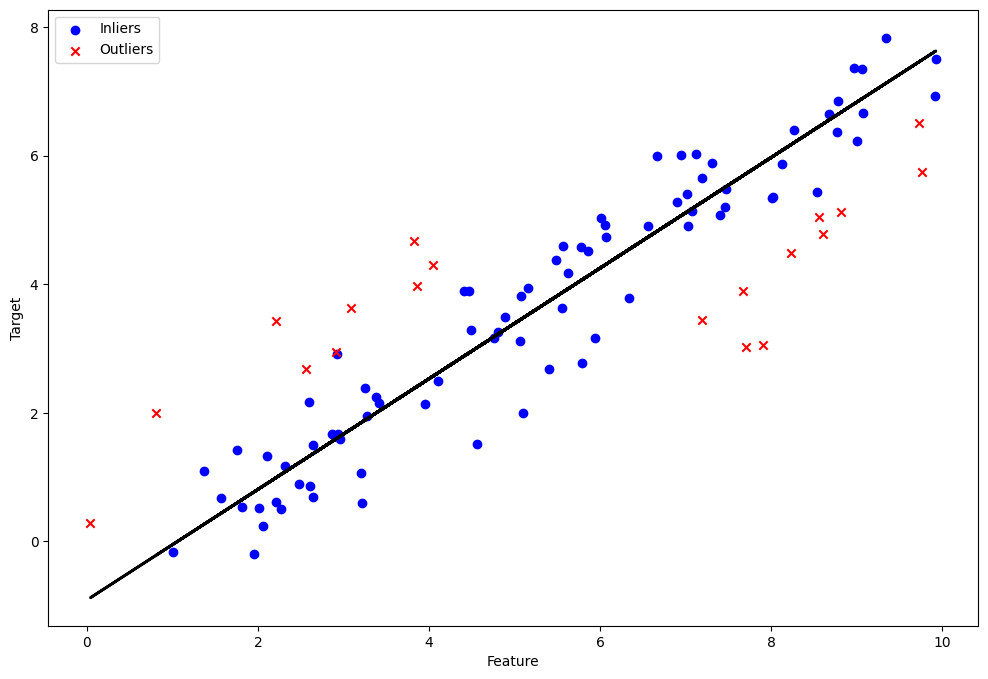

In [159]:
plt.figure(figsize=(12, 8))
plt.scatter(X[inlier_mask], y[inlier_mask], color='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='red', marker='x', label='Outliers')
plt.plot(X, ransac.predict(X), color='black', linewidth=2)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend(loc='upper left');